# Plots and interfaces

In this section, we review the visual aids provided by $\textsc{LiMe}$ measurements, as well as, some tips on how to adjust them to your workflow 

## Jupyter notebooks 

$\textsc{LiMe}$ functions should work in any IDE (Integrated Developement Environment) including [Jupyter Notebooks](https://jupyter.org/).

However, many of $\textsc{LiMe}$ plotting tools make use of [matplotlib widgets](https://matplotlib.org/stable/gallery/index.html#widgets) to select data or review the measurements. To take advantange of these features (as well as the default matplotlib [plot tools](https://matplotlib.org/stable/users/explain/interactive.html)) in a notebook, a few extra lines of code may be necessary.

This page has been compiled from a notebook file which can be downloaded from this [link](https://github.com/Vital-Fernandez/lime/tree/master/examples) at the library github. You can download it, alongside the [tutorials data](https://github.com/Vital-Fernandez/lime/tree/master/examples), to test the best configuration for your work.

Let's start by getting the data from the [third tutorial](https://lime-stable.readthedocs.io/en/latest/tutorials/3_CompleteSpec.html):

In [2]:
# %matplotlib notebook
import numpy as np
from astropy.io import fits
import os
import shutil


import lime
# import os, sys
# sys.path.append('../../../src')
# import lime

def import_osiris_fits(file_address, ext=0):

    # Open fits file
    with fits.open(file_address) as hdul:
        data, hdr = hdul[ext].data, hdul[ext].header

    w_min, dw, n_pix = hdr['CRVAL1'],  hdr['CD1_1'], hdr['NAXIS1']
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)

    return wavelength, data, hdr

# State the data location
obsFitsFile = '../../../examples/sample_data/gp121903_BR.fits'
lineMaskFile = '../../../examples/sample_data/osiris_mask.txt'
cfgFile = '../../../examples/sample_data/config_file.cfg'

# Load the scientific data
wave, flux, header = import_osiris_fits(obsFitsFile)
mask = lime.load_lines_log(lineMaskFile)
obs_cfg = lime.load_cfg(cfgFile)

# Declare line measuring object
z_obj = obs_cfg['sample_data']['z_array'][2]
norm_flux = obs_cfg['sample_data']['norm_flux']

Now we are going to define a ``Spectrum`` object and plot it

In [1]:
gp_spec = lime.Spectrum(wave, flux, redshift=z_obj, norm_flux=norm_flux)
gp_spec.plot_spectrum(spec_label=f'GP121903 spectrum', frame='rest')

NameError: name 'lime' is not defined

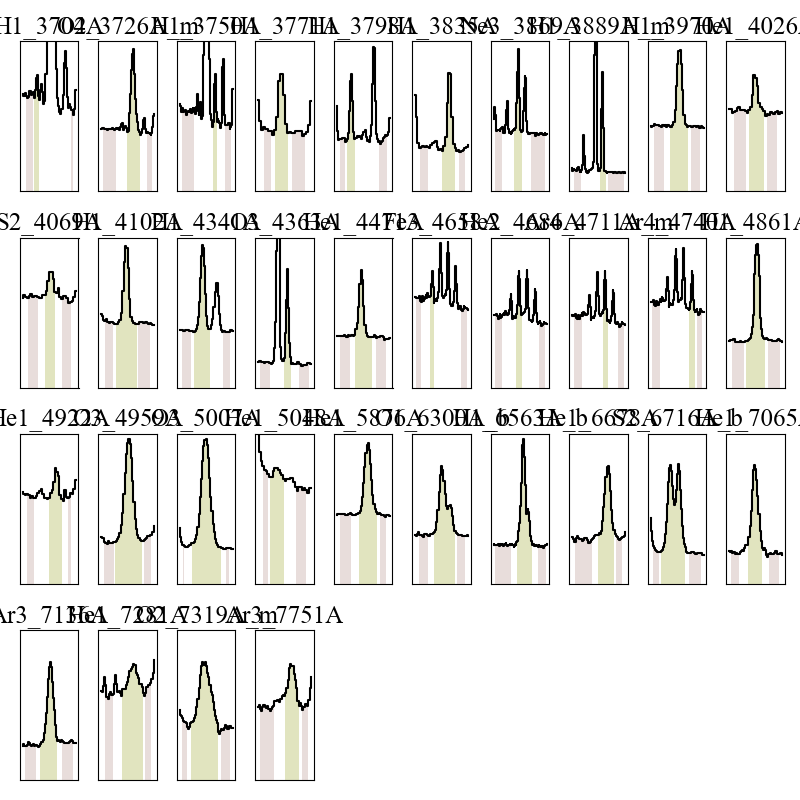

In [6]:

lime.MaskInspector(lineMaskFile, input_wave=wave, input_flux=flux, redshift=z_obj, norm_flux=norm_flux)
